In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import re
matplotlib.rc('text',usetex=True)
matplotlib.rcParams['font.family'] = 'sans'
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['lines.markersize'] = 8
matplotlib.rcParams['lines.markeredgewidth'] = 2.5
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 2
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['ytick.minor.size'] = 2
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['figure.subplot.hspace'] = 0.3

In [2]:
#Load data

#RVS
water2_rvs_file = 'result-water2-rvs-aug-cc-pvtz.dat'
zn_h2o_rvs_file = 'result-zn-hoh-rvs-aug-cc-pvtz.dat'
f_h2o_rvs_file = 'result-f-hoh-rvs-aug-cc-pvtz.dat'
zn_h2o_rvs_lr_file = 'result-zn-hoh-rvs-aug-cc-pvtz-9A.dat'

rvs = {}
rvs['water2'] = pd.read_csv(water2_rvs_file,sep='\s+',header=0,comment='#')
rvs['zn_h2o'] = pd.read_csv(zn_h2o_rvs_file,sep='\s+',header=0,comment='#')
rvs['f_h2o'] = pd.read_csv(f_h2o_rvs_file,sep='\s+',header=0,comment='#')
rvs['zn_h2o_lr'] = pd.read_csv(zn_h2o_rvs_lr_file,sep='\s+',header=0,comment='#')

In [3]:
rvs['zn_h2o_lr']

d    Elec     Rep     E1    Pol    Ct     E2    Tot
0   1.5 -193.71  238.90  45.19 -67.82 -5.04 -72.86 -31.69
1   1.6 -150.72  154.46   3.74 -60.57 -3.36 -63.93 -63.25
2   1.7 -120.52  100.10 -20.43 -54.66 -2.54 -57.20 -79.95
3   1.8  -98.88   64.95 -33.94 -49.49 -2.19 -51.68 -87.39
4   1.9  -83.05   42.15 -40.90 -44.75 -2.11 -46.86 -89.12
5   2.0  -71.22   27.33 -43.89 -40.29 -2.19 -42.48 -87.41
6   2.1  -62.18   17.70 -44.48 -36.07 -2.34 -38.41 -83.69
7   2.2  -55.12   11.45 -43.67 -32.08 -2.53 -34.61 -78.91
8   2.3  -49.47    7.39 -42.08 -28.35 -2.71 -31.06 -73.63
9   2.4  -44.86    4.77 -40.09 -24.91 -2.85 -27.76 -68.23
10  2.5  -41.02    3.08 -37.93 -21.79 -2.92 -24.71 -62.94
11  2.6  -37.75    2.00 -35.75 -19.00 -2.92 -21.92 -57.90
12  2.7  -34.92    1.30 -33.62 -16.54 -2.83 -19.37 -53.17
13  2.8  -32.45    0.85 -31.60 -14.39 -2.68 -17.07 -48.81
14  2.9  -30.25    0.55 -29.70 -12.53 -2.47 -15.00 -44.81
15  3.0  -28.29    0.37 -27.93 -10.93 -2.23 -13.16 -41.17
16  3.4  -22.15    0.07 -22.08  -6.49 -1.24  -7.73 -29.84
17  3.8  -17.84    0.02 -17.82  -4.04 -0.56  -4.60 -22.44
18  4.2  -14.67    0.00 -14.67  -2.65 -0.22  -2.87 -17.54
19  4.6  -12.27    0.00 -12.27  -1.81 -0.08  -1.89 -14.17
20  5.0  -10.42    0.00 -10.42  -1.29 -0.03  -1.32 -11.73
21  5.4   -8.95    0.00  -8.95  -0.94 -0.01  -0.95  -9.90
22  5.8   -7.78   -0.00  -7.78  -0.70 -0.00  -0.70  -8.48
23  6.2   -6.82   -0.00  -6.82  -0.54 -0.00  -0.54  -7.35
24  6.6   -6.02   -0.00  -6.02  -0.42 -0.00  -0.42  -6.44
25  7.0   -5.36   -0.00  -5.36  -0.33 -0.00  -0.33  -5.69
26  7.4   -4.80   -0.00  -4.80  -0.26 -0.00  -0.26  -5.06
27  7.8   -4.32   -0.00  -4.32  -0.21 -0.00  -0.21  -4.54
28  8.2   -3.91   -0.00  -3.91  -0.18 -0.00  -0.18  -4.09
29  8.6   -3.56   -0.00  -3.56  -0.14 -0.00  -0.14  -3.70
30  9.0   -3.25   -0.00  -3.25  -0.12 -0.00  -0.12  -3.37

In [4]:
#CSOV (B3LYP)
water2_csov_file = 'result-water2-csov-aug-cc-pvtz.dat'
zn_h2o_csov_file = 'result-zn-hoh-csov-aug-cc-pvtz.dat'
f_h2o_csov_file = 'result-f-hoh-csov-aug-cc-pvtz.dat'
zn_h2o_csov_lr_file = 'result-zn-hoh-csov-aug-cc-pvtz-9A.dat'

csov = {}
csov['water2'] = pd.read_csv(water2_csov_file,sep='\s+',header=0,comment='#')
csov['zn_h2o'] = pd.read_csv(zn_h2o_csov_file,sep='\s+',header=0,comment='#')
csov['f_h2o'] = pd.read_csv(f_h2o_csov_file,sep='\s+',header=0,comment='#')
csov['zn_h2o_lr'] = pd.read_csv(zn_h2o_csov_lr_file,sep='\s+',header=0,comment='#')

In [5]:
#ALMO (PBE0)

water2_almo_file = 'result-water2-almo-aug-cc-pvtz-pbe0.dat'
zn_h2o_almo_file = 'result-zn-hoh-almo-aug-cc-pvtz-pbe0.dat'
f_h2o_almo_file = 'result-f-hoh-almo-aug-cc-pvtz-pbe0.dat'


almo = {}
almo['water2'] = pd.read_csv(water2_almo_file,sep='\s+',header=0,comment='#')
almo['zn_h2o'] = pd.read_csv(zn_h2o_almo_file,sep='\s+',header=0,comment='#')
almo['f_h2o'] = pd.read_csv(f_h2o_almo_file,sep='\s+',header=0,comment='#')

#attention No dATA for Zn...H2O at 3.O Ang with almo (not converged) --> use distance of the almo file

In [15]:
#ALMO(wb97xd)

water2_wb97xd_file = 'result-water2-almo-aug-cc-pvtz-wb97xd.dat'
zn_h2o_wb97xd_file = 'result-zn-hoh-almo-aug-cc-pvtz-wb97xd.dat'
f_h2o_wb97xd_file  = 'result-f-hoh-almo-aug-cc-pvtz-wb97xd.dat'
cl_h2o_wb97xd_file = 'result-cl-hoh-almo-aug-cc-pvtz-wb97xd.dat'
oh_h2o_wb97xd_file = 'result-oh-hoh-almo-aug-cc-pvtz-wb97xd.dat'
zn_h2o_wb97xd_lr_file = 'result-zn-hoh-almo-aug-cc-pvtz-wb97xd-9A.dat'

almo_wb97xd = {}
almo_wb97xd['water2'] = pd.read_csv(water2_wb97xd_file,sep='\s+',header=0,comment='#',index_col=False)
almo_wb97xd['zn_h2o'] = pd.read_csv(zn_h2o_wb97xd_file,sep='\s+',header=0,comment='#',index_col=False)
almo_wb97xd['f_h2o']  = pd.read_csv(f_h2o_wb97xd_file,sep='\s+',header=0,comment='#')
almo_wb97xd['cl_h2o'] = pd.read_csv(cl_h2o_wb97xd_file,sep='\s+',header=0,comment='#')
almo_wb97xd['oh_h2o'] = pd.read_csv(oh_h2o_wb97xd_file,sep='\s+',header=0,comment='#')
almo_wb97xd['zn_h2o_lr'] = pd.read_csv(zn_h2o_wb97xd_lr_file,sep='\s+',header=0,comment='#',index_col=False)



In [7]:
#SAPTDFT(PBE0)||AC||NoS^2

water2_saptdft_pbe0_file = 'result-water2-saptdft-aug-cc-pvtz-pbe0.dat'
zn_h2o_saptdft_pbe0_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0.dat'
f_h2o_saptdft_pbe0_file = 'f-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'
zn_h2o_saptdft_pbe0_lr_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0-9A.dat'

saptdft_pbe0 = {}
saptdft_pbe0['water2'] = pd.read_csv(water2_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['f_h2o'] = pd.read_csv(f_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['zn_h2o_lr'] = pd.read_csv(zn_h2o_saptdft_pbe0_lr_file,sep='\s+',header=0,comment='#')

In [8]:
#SAPT2

water2_sapt2_file = 'Result-water2-sapt2-aug-cc-pvtz.dat'
zn_h2o_sapt2_file = 'Result-zn-hoh-sapt2-aug-cc-pvtz.dat'
f_h2o_sapt2_file = 'Result-f-hoh-sapt2-aug-cc-pvtz.dat'
zn_h2o_sapt2_lr_file = 'Result-zn-hoh-sapt2-aug-cc-pvtz-9A.dat'

sapt2 = {}
sapt2['water2'] = pd.read_csv(water2_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['zn_h2o'] = pd.read_csv(zn_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['f_h2o'] = pd.read_csv(f_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['zn_h2o_lr'] = pd.read_csv(zn_h2o_sapt2_lr_file,sep='\s+',header=0,comment='#')

In [9]:
#SAPT2+3

water2_sapt2p3_file = 'Result-water2-sapt2+3-aug-cc-pvtz.dat'
zn_h2o_sapt2p3_file = 'Result-zn-hoh-sapt2+3-aug-cc-pvtz.dat'
f_h2o_sapt2p3_file = 'Result-f-hoh-sapt2+3-aug-cc-pvtz.dat'
zn_h2o_sapt2p3_lr_file = 'Result-zn-hoh-sapt2+3-aug-cc-pvtz-9A.dat'

sapt2p3 = {}
sapt2p3['water2'] = pd.read_csv(water2_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['zn_h2o'] = pd.read_csv(zn_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['f_h2o'] = pd.read_csv(f_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['zn_h2o_lr'] = pd.read_csv(zn_h2o_sapt2p3_lr_file,sep='\s+',header=0,comment='#')

In [10]:
#CCSD(T)

water2_cc_file = 'water2-ccsdt-aug-cc-pvtz.dat'
zn_h2o_cc_file = 'zn-hoh-ccsdt-aug-cc-pvtz.dat'
f_h2o_cc_file = 'f-hoh-ccsdt-aug-cc-pvtz.dat'
zn_h2o_cc_lr_file = 'zn-hoh-ccsdt-aug-cc-pvtz-9A.dat'

cc_ref = {}
cc_ref['water2'] = pd.read_csv(water2_cc_file,sep='\s+',header=0,comment='#')
cc_ref['zn_h2o'] = pd.read_csv(zn_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['f_h2o'] = pd.read_csv(f_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['zn_h2o_lr'] = pd.read_csv(zn_h2o_cc_lr_file,sep='\s+',header=0,comment='#')


In [11]:
# Distance 
water2_d_file = 'distance_water2.dat'
zn_h2o_d_file = 'distance_zn_hoh.dat'
f_h2o_d_file = 'distance_f_hoh.dat'

d = {}
d['water2'] = pd.read_csv(water2_d_file,sep='\s+',header=0,comment='#')
d['zn_h2o'] = pd.read_csv(zn_h2o_d_file,sep='\s+',header=0,comment='#')
d['f_h2o'] = pd.read_csv(f_h2o_d_file,sep='\s+',header=0,comment='#')

Ajout ALMO(wB97X-D) data

Text(0.5, 1.0, 'Dispersion')

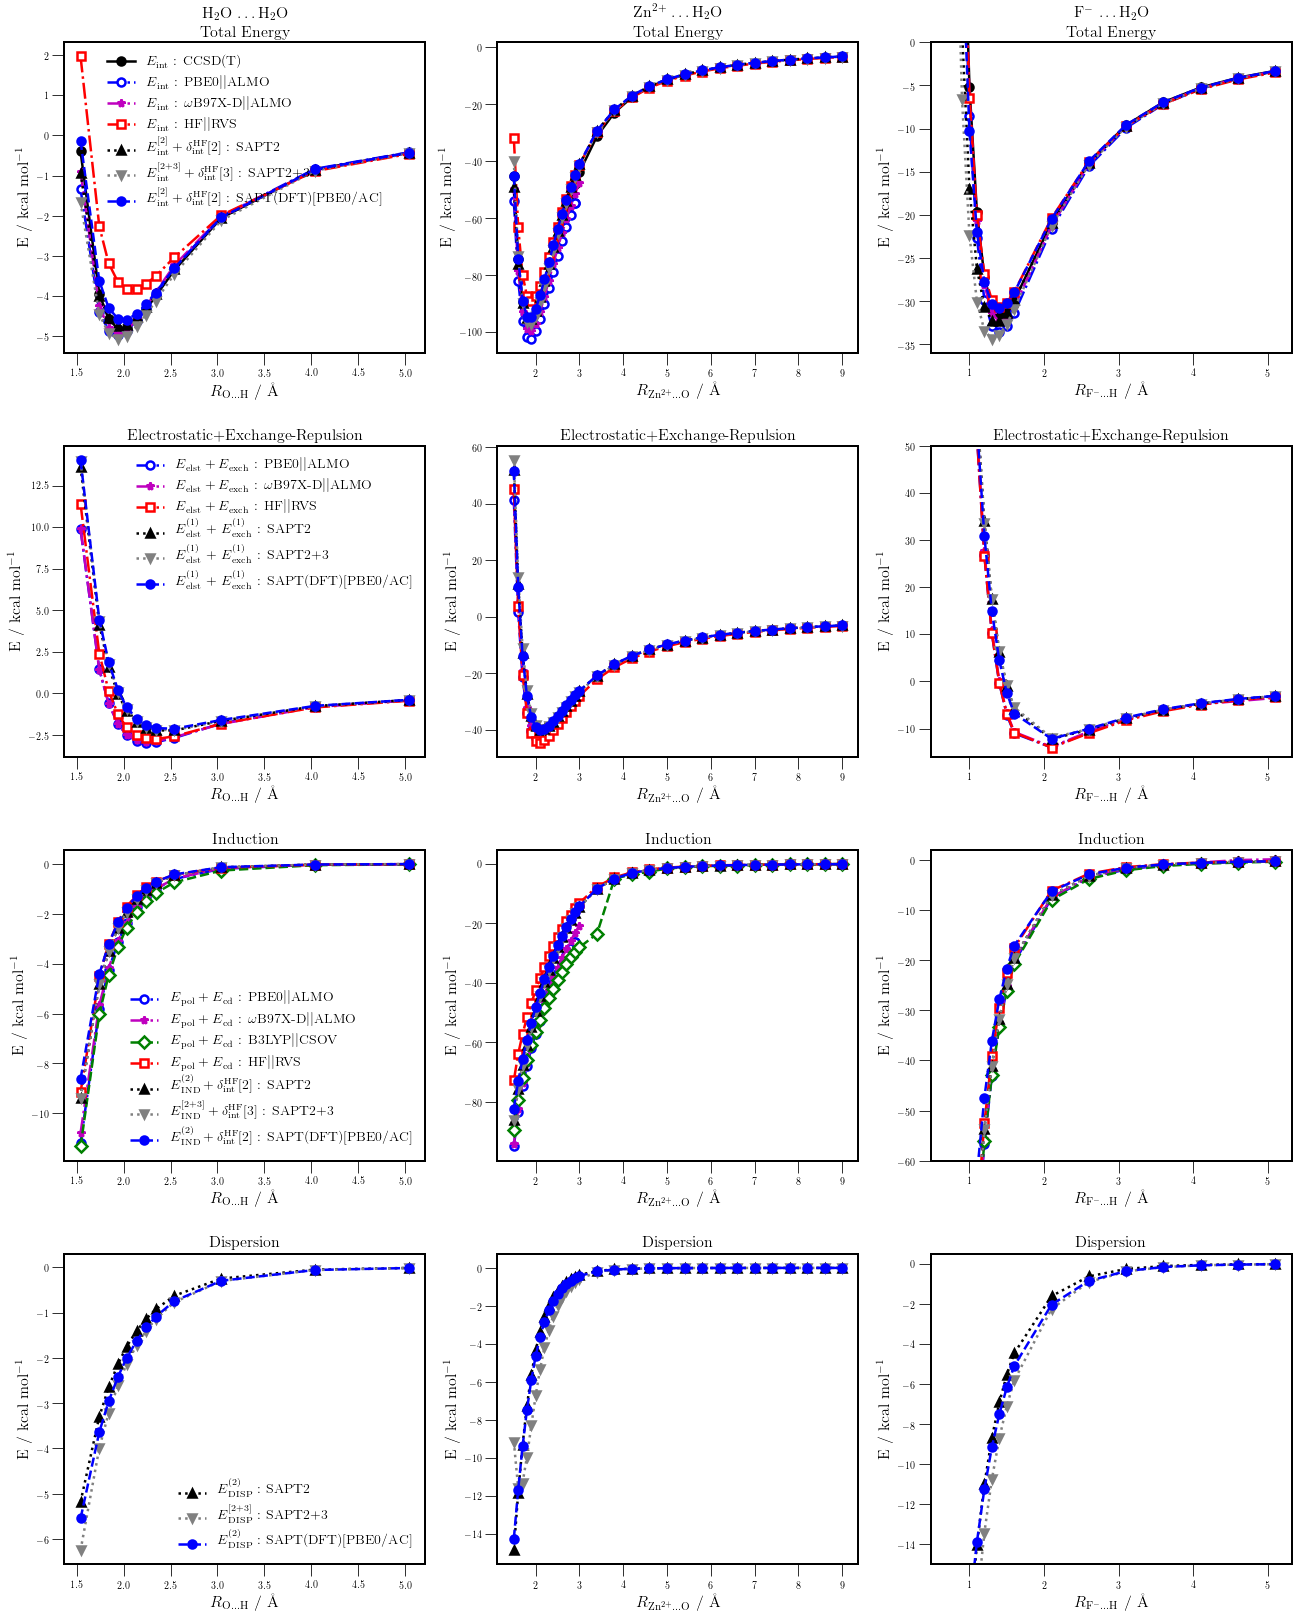

In [12]:
cc_alpha = 1.0 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive
almo_alpha = 1.0
#Xlabel = 'd / \u00c5'
#Ylabel = 'E / kcal mol$^{-1}$'

Xlabel_W=''r'$R_{\mathrm{O\dots H}}$ / $\mathrm{\AA}$'''
Xlabel_Zn=''r'$R_{\mathrm{Zn^{2+}\dots O}}$ / $\mathrm{\AA}$'''
Xlabel_F=''r'$R_{\mathrm{F^-\dots H}}$ / $\mathrm{\AA}$'''

Ylabel = 'E / kcal mol$^{-1}$'

Title_W = 'H$_{2}$O \dots H$_{2}$O'
Title_Zn = 'Zn$^{2+}$ \dots H$_{2}$O' 
Title_F = 'F$^{-}$ \dots H$_{2}$O' 

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
#fig3, grph = plt.subplots(4, 3, figsize=(20,4*6))
fig3, grph = plt.subplots(4, 3, figsize=(22,4*7))

##########
# H20..H2O
##########

##Eint##

grph[0, 0].plot(d['water2']['d'], cc_ref['water2']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 0].plot(d['water2']['d'],almo['water2']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph[0, 0].plot(d['water2']['d'],almo_wb97xd['water2']['SCF-TOT'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : $\omega$B97X-D$||$ALMO')


grph[0, 0].plot(d['water2']['d'],rvs['water2']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph[0, 0].plot(d['water2']['d'],sapt2['water2']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph[0, 0].plot(d['water2']['d'],sapt2p3['water2']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[0, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[0, 0].set_xlabel(Xlabel_W)
grph[0, 0].set_ylabel(Ylabel)
#grph[0, 0].set_xlim(1.4,3.1)
#grph[0, 0].set_ylim(-5.3,+0.9)
grph[0, 0].legend(loc='best',frameon=False)
#grph[0, 0].set_title('H$_{2}$O \dots H$_{2}$O')
grph[0, 0].set_title('H$_{2}$O \dots H$_{2}$O \n Total Energy')

##E_elst + E_exch ##

grph[1, 0].plot(d['water2']['d'],almo['water2']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph[1, 0].plot(d['water2']['d'],almo_wb97xd['water2']['FRZ'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : $\omega$B97X-D$||$ALMO')

grph[1, 0].plot(d['water2']['d'],rvs['water2']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph[1, 0].plot(d['water2']['d'],sapt2['water2']['Elec']+sapt2['water2']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2')
grph[1, 0].plot(d['water2']['d'],sapt2p3['water2']['Elec']+sapt2p3['water2']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2+3')
grph[1, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['elst']+saptdft_pbe0['water2']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph[1, 0].set_xlabel(Xlabel_W)
grph[1, 0].set_ylabel(Ylabel)
#grph[1, 0].set_xlim(1.4,3.1)
#grph[1, 0].set_ylim(,)
grph[1, 0].legend(loc='upper right',frameon=False)
#grph[1, 0].set_title('H$_{2}$O \dots H$_{2}$O')
grph[1, 0].set_title('Electrostatic+Exchange-Repulsion')


## Induction : E_ct + E_pol &  ##

grph[2, 0].plot(d['water2']['d'],almo['water2']['POL']+almo['water2']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[2, 0].plot(d['water2']['d'],almo_wb97xd['water2']['POL']+almo_wb97xd['water2']['SCF-Ct1'],
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : $\omega$B97X-D$||$ALMO')

grph[2, 0].plot(d['water2']['d'],csov['water2']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[2, 0].plot(d['water2']['d'],rvs['water2']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph[2, 0].plot(d['water2']['d'],sapt2['water2']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph[2, 0].plot(d['water2']['d'],sapt2p3['water2']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[2, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[2, 0].set_xlabel(Xlabel_W)
grph[2, 0].set_ylabel(Ylabel)
#grph[2, 0].set_xlim(1.4,3.1)
#grph[2, 0].set_ylim(,)
grph[2, 0].legend(loc='lower right',frameon=False)
#grph[2, 0].set_title('H$_{2}$O \dots H$_{2}$O')
grph[2, 0].set_title('Induction')

## E_disp  ##
grph[3, 0].plot(d['water2']['d'],sapt2['water2']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph[3, 0].plot(d['water2']['d'],sapt2p3['water2']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{[2+3]}}$ : SAPT2+3')
grph[3, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph[3, 0].set_xlabel(Xlabel_W)
grph[3, 0].set_ylabel(Ylabel)
#grph[3, 0].set_xlim(1.4,3.1)
#grph[3, 0].set_ylim(,)
grph[3, 0].legend(loc='lower right',frameon=False)
#grph[3, 0].set_title('H$_{2}$O \dots H$_{2}$O')
grph[3, 0].set_title('Dispersion')

##########
# Zn..H2O
##########

##Eint##

grph[0, 1].plot(cc_ref['zn_h2o_lr']['d'], cc_ref['zn_h2o_lr']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph[0, 1].plot(almo_wb97xd['zn_h2o']['d'],almo_wb97xd['zn_h2o']['SCF-TOT'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : $\omega$B97-XD$||$ALMO')

grph[0, 1].plot(rvs['zn_h2o_lr']['d'],rvs['zn_h2o_lr']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph[0, 1].plot(sapt2['zn_h2o_lr']['d'],sapt2['zn_h2o_lr']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph[0, 1].plot(sapt2p3['zn_h2o_lr']['d'],sapt2p3['zn_h2o_lr']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[0, 1].plot(saptdft_pbe0['zn_h2o_lr']['d'],saptdft_pbe0['zn_h2o_lr']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[0, 1].set_xlabel(Xlabel_Zn)
grph[0, 1].set_ylabel(Ylabel)
#grph[0, 1].set_xlim(1.5,4.0)
##grph[0, 1].set_ylim(-109.0,-38.0)
#grph[0, 1].legend(loc='best',frameon=False)
#grph[0, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[0, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O \n Total Energy')

##E_elst + E_exch ##

grph[1, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph[1, 1].plot(almo_wb97xd['zn_h2o_lr']['d'],almo_wb97xd['zn_h2o_lr']['FRZ'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : $\omega$B97-XD$||$ALMO')

grph[1, 1].plot(rvs['zn_h2o_lr']['d'],rvs['zn_h2o_lr']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph[1, 1].plot(sapt2['zn_h2o_lr']['d'],sapt2['zn_h2o_lr']['Elec']+sapt2['zn_h2o_lr']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2')
grph[1, 1].plot(sapt2p3['zn_h2o_lr']['d'],sapt2p3['zn_h2o_lr']['Elec']+sapt2p3['zn_h2o_lr']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2+3')
grph[1, 1].plot(saptdft_pbe0['zn_h2o_lr']['d'],saptdft_pbe0['zn_h2o_lr']['elst']+saptdft_pbe0['zn_h2o_lr']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph[1, 1].set_xlabel(Xlabel_Zn)
grph[1, 1].set_ylabel(Ylabel)
#grph[1, 1].set_xlim(1.4,3.1)
#grph[1, 1].set_ylim(,)
#grph[1, 1].legend(loc='upper right',frameon=False)
#grph[1, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[1, 1].set_title('Electrostatic+Exchange-Repulsion')

## Induction : E_ct + E_pol &  ##

grph[2, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['POL']+almo['zn_h2o']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[2, 1].plot(almo_wb97xd['zn_h2o_lr']['d'],almo_wb97xd['zn_h2o']['POL']+almo_wb97xd['zn_h2o_lr']['SCF-Ct1'],
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : $\omega$B97-XD$||$ALMO')

grph[2, 1].plot(csov['zn_h2o_lr']['d'],csov['zn_h2o_lr']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[2, 1].plot(rvs['zn_h2o_lr']['d'],rvs['zn_h2o_lr']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph[2, 1].plot(sapt2['zn_h2o_lr']['d'],sapt2['zn_h2o_lr']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph[2, 1].plot(sapt2p3['zn_h2o_lr']['d'],sapt2p3['zn_h2o_lr']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[2, 1].plot(sapt2p3['zn_h2o_lr']['d'],saptdft_pbe0['zn_h2o_lr']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[2, 1].set_xlabel(Xlabel_Zn)
grph[2, 1].set_ylabel(Ylabel)
#grph[2, 1].set_xlim(1.4,3.1)
#grph[2, 1].set_ylim(,)
#grph[2, 1].legend(loc='lower right',frameon=False)
#grph[2, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[2, 1].set_title('Induction')

## E_disp  ##
grph[3, 1].plot(sapt2['zn_h2o_lr']['d'],sapt2['zn_h2o_lr']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph[3, 1].plot(sapt2p3['zn_h2o_lr']['d'],sapt2p3['zn_h2o_lr']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{[2+3]}}$ : SAPT2+3')
grph[3, 1].plot(saptdft_pbe0['zn_h2o_lr']['d'],saptdft_pbe0['zn_h2o_lr']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph[3, 1].set_xlabel(Xlabel_Zn)
grph[3, 1].set_ylabel(Ylabel)
#grph[3, 1].set_xlim(1.4,3.1)
#grph[3, 1].set_ylim(,)
#grph[3, 1].legend(loc='lower right',frameon=False)
#grph[3, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[3, 1].set_title('Dispersion')

##########
# F..H2O
##########

##Eint##

grph[0, 2].plot(d['f_h2o']['d'], cc_ref['f_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 2].plot(d['f_h2o']['d'],almo['f_h2o']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph[0, 2].plot(d['f_h2o']['d'],almo_wb97xd['f_h2o']['SCF-TOT'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : $\omega$B97-XD$||$ALMO')

grph[0, 2].plot(d['f_h2o']['d'],rvs['f_h2o']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph[0, 2].plot(d['f_h2o']['d'],sapt2['f_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph[0, 2].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[0, 2].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[0, 2].set_xlabel(Xlabel_F)
grph[0, 2].set_ylabel(Ylabel)
#grph[0, 2].set_xlim(+0.9,5.1)
grph[0, 2].set_ylim(-36,0)
#grph[0, 2].legend(loc='best',frameon=False)
#grph[0, 2].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[0, 2].set_title('F$^{-}$ \dots H$_{2}$O \n Total Energy')

##E_elst + E_exch ##

grph[1, 2].plot(d['f_h2o']['d'],almo['f_h2o']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph[1, 2].plot(d['f_h2o']['d'],almo_wb97xd['f_h2o']['FRZ'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : $\omega$B97-XD$||$ALMO')

grph[1, 2].plot(d['f_h2o']['d'],rvs['f_h2o']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph[1, 2].plot(d['f_h2o']['d'],sapt2['f_h2o']['Elec']+sapt2['f_h2o']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2')
grph[1, 2].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Elec']+sapt2p3['f_h2o']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2+3')
grph[1, 2].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['elst']+saptdft_pbe0['f_h2o']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph[1, 2].set_xlabel(Xlabel_F)
grph[1, 2].set_ylabel(Ylabel)
#grph[1, 2].set_xlim(1.4,3.1)
grph[1, 2].set_ylim(-16,50)
#grph[1, 2].legend(loc='upper right',frameon=False)
#grph[1, 2].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[1, 2].set_title('Electrostatic+Exchange-Repulsion')

## Induction : E_ct + E_pol &  ##

grph[2, 2].plot(d['f_h2o']['d'],almo['f_h2o']['POL']+almo['f_h2o']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[2, 2].plot(d['f_h2o']['d'],almo_wb97xd['f_h2o']['POL']+almo_wb97xd['f_h2o']['SCF-Ct1'],
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : $\omega$B97-XD$||$ALMO')


grph[2, 2].plot(d['f_h2o']['d'],csov['f_h2o']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[2, 2].plot(d['f_h2o']['d'],rvs['f_h2o']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph[2, 2].plot(d['f_h2o']['d'],sapt2['f_h2o']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph[2, 2].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[2, 2].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[2, 2].set_xlabel(Xlabel_F)
grph[2, 2].set_ylabel(Ylabel)
#grph[2, 2].set_xlim(1.4,3.1)
grph[2, 2].set_ylim(-60,2)
#grph[2, 2].legend(loc='lower right',frameon=False)
#grph[2, 2].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[2, 2].set_title('Induction')

## E_disp  ##
grph[3, 2].plot(d['f_h2o']['d'],sapt2['f_h2o']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph[3, 2].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{[2+3]}}$ : SAPT2+3')
grph[3, 2].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph[3, 2].set_xlabel(Xlabel_F)
grph[3, 2].set_ylabel(Ylabel)
#grph[3, 2].set_xlim(1.4,3.1)
grph[3, 2].set_ylim(-15,0.5)
#grph[3, 2].legend(loc='lower right',frameon=False)
#grph[3, 2].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[3, 2].set_title('Dispersion')

In [13]:
#fig3.savefig('Comparison_of_SAPT_SAPTDFT_and_EDAs+Fluor+wB97XD_lr.pdf')

Text(0.5, 1.0, 'Dispersion')

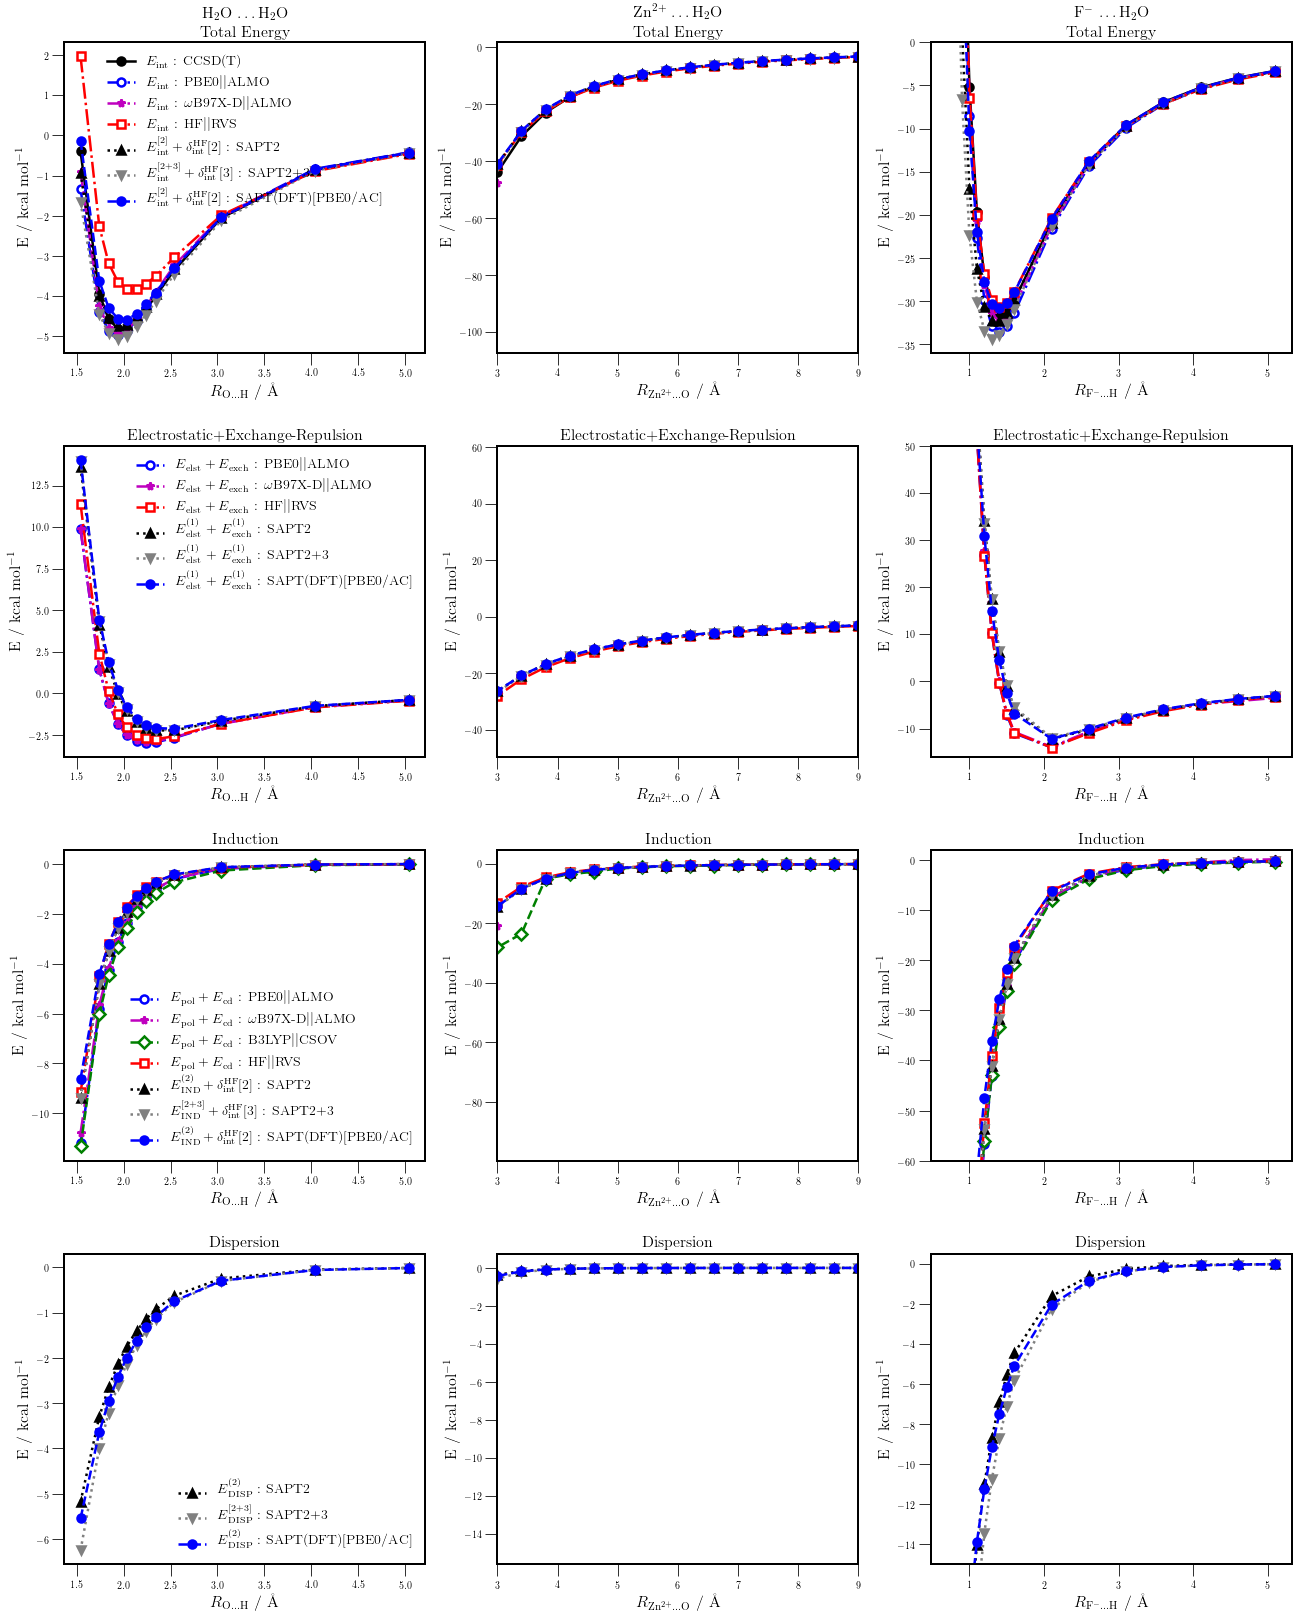

In [14]:
cc_alpha = 1.0 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive
almo_alpha = 1.0
#Xlabel = 'd / \u00c5'
#Ylabel = 'E / kcal mol$^{-1}$'

Xlabel_W=''r'$R_{\mathrm{O\dots H}}$ / $\mathrm{\AA}$'''
Xlabel_Zn=''r'$R_{\mathrm{Zn^{2+}\dots O}}$ / $\mathrm{\AA}$'''
Xlabel_F=''r'$R_{\mathrm{F^-\dots H}}$ / $\mathrm{\AA}$'''

Ylabel = 'E / kcal mol$^{-1}$'

Title_W = 'H$_{2}$O \dots H$_{2}$O'
Title_Zn = 'Zn$^{2+}$ \dots H$_{2}$O' 
Title_F = 'F$^{-}$ \dots H$_{2}$O' 

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
#fig3, grph = plt.subplots(4, 3, figsize=(20,4*6))
fig3, grph = plt.subplots(4, 3, figsize=(22,4*7))

##########
# H20..H2O
##########

##Eint##

grph[0, 0].plot(d['water2']['d'], cc_ref['water2']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 0].plot(d['water2']['d'],almo['water2']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph[0, 0].plot(d['water2']['d'],almo_wb97xd['water2']['SCF-TOT'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : $\omega$B97X-D$||$ALMO')


grph[0, 0].plot(d['water2']['d'],rvs['water2']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph[0, 0].plot(d['water2']['d'],sapt2['water2']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph[0, 0].plot(d['water2']['d'],sapt2p3['water2']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[0, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[0, 0].set_xlabel(Xlabel_W)
grph[0, 0].set_ylabel(Ylabel)
#grph[0, 0].set_xlim(1.4,3.1)
#grph[0, 0].set_ylim(-5.3,+0.9)
grph[0, 0].legend(loc='best',frameon=False)
#grph[0, 0].set_title('H$_{2}$O \dots H$_{2}$O')
grph[0, 0].set_title('H$_{2}$O \dots H$_{2}$O \n Total Energy')

##E_elst + E_exch ##

grph[1, 0].plot(d['water2']['d'],almo['water2']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph[1, 0].plot(d['water2']['d'],almo_wb97xd['water2']['FRZ'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : $\omega$B97X-D$||$ALMO')

grph[1, 0].plot(d['water2']['d'],rvs['water2']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph[1, 0].plot(d['water2']['d'],sapt2['water2']['Elec']+sapt2['water2']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2')
grph[1, 0].plot(d['water2']['d'],sapt2p3['water2']['Elec']+sapt2p3['water2']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2+3')
grph[1, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['elst']+saptdft_pbe0['water2']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph[1, 0].set_xlabel(Xlabel_W)
grph[1, 0].set_ylabel(Ylabel)
#grph[1, 0].set_xlim(1.4,3.1)
#grph[1, 0].set_ylim(,)
grph[1, 0].legend(loc='upper right',frameon=False)
#grph[1, 0].set_title('H$_{2}$O \dots H$_{2}$O')
grph[1, 0].set_title('Electrostatic+Exchange-Repulsion')


## Induction : E_ct + E_pol &  ##

grph[2, 0].plot(d['water2']['d'],almo['water2']['POL']+almo['water2']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[2, 0].plot(d['water2']['d'],almo_wb97xd['water2']['POL']+almo_wb97xd['water2']['SCF-Ct1'],
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : $\omega$B97X-D$||$ALMO')

grph[2, 0].plot(d['water2']['d'],csov['water2']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[2, 0].plot(d['water2']['d'],rvs['water2']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph[2, 0].plot(d['water2']['d'],sapt2['water2']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph[2, 0].plot(d['water2']['d'],sapt2p3['water2']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[2, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[2, 0].set_xlabel(Xlabel_W)
grph[2, 0].set_ylabel(Ylabel)
#grph[2, 0].set_xlim(1.4,3.1)
#grph[2, 0].set_ylim(,)
grph[2, 0].legend(loc='lower right',frameon=False)
#grph[2, 0].set_title('H$_{2}$O \dots H$_{2}$O')
grph[2, 0].set_title('Induction')

## E_disp  ##
grph[3, 0].plot(d['water2']['d'],sapt2['water2']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph[3, 0].plot(d['water2']['d'],sapt2p3['water2']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{[2+3]}}$ : SAPT2+3')
grph[3, 0].plot(d['water2']['d'],saptdft_pbe0['water2']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph[3, 0].set_xlabel(Xlabel_W)
grph[3, 0].set_ylabel(Ylabel)
#grph[3, 0].set_xlim(1.4,3.1)
#grph[3, 0].set_ylim(,)
grph[3, 0].legend(loc='lower right',frameon=False)
#grph[3, 0].set_title('H$_{2}$O \dots H$_{2}$O')
grph[3, 0].set_title('Dispersion')

##########
# Zn..H2O
##########

##Eint##

grph[0, 1].plot(cc_ref['zn_h2o_lr']['d'], cc_ref['zn_h2o_lr']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph[0, 1].plot(almo_wb97xd['zn_h2o']['d'],almo_wb97xd['zn_h2o']['SCF-TOT'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : $\omega$B97-XD$||$ALMO')

grph[0, 1].plot(rvs['zn_h2o_lr']['d'],rvs['zn_h2o_lr']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph[0, 1].plot(sapt2['zn_h2o_lr']['d'],sapt2['zn_h2o_lr']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph[0, 1].plot(sapt2p3['zn_h2o_lr']['d'],sapt2p3['zn_h2o_lr']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[0, 1].plot(saptdft_pbe0['zn_h2o_lr']['d'],saptdft_pbe0['zn_h2o_lr']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[0, 1].set_xlabel(Xlabel_Zn)
grph[0, 1].set_ylabel(Ylabel)
grph[0, 1].set_xlim(3,9)
##grph[0, 1].set_ylim(-109.0,-38.0)
#grph[0, 1].legend(loc='best',frameon=False)
#grph[0, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[0, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O \n Total Energy')

##E_elst + E_exch ##

grph[1, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph[1, 1].plot(almo_wb97xd['zn_h2o']['d'],almo_wb97xd['zn_h2o']['FRZ'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : $\omega$B97-XD$||$ALMO')

grph[1, 1].plot(rvs['zn_h2o_lr']['d'],rvs['zn_h2o_lr']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph[1, 1].plot(sapt2['zn_h2o_lr']['d'],sapt2['zn_h2o_lr']['Elec']+sapt2['zn_h2o_lr']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2')
grph[1, 1].plot(sapt2p3['zn_h2o_lr']['d'],sapt2p3['zn_h2o_lr']['Elec']+sapt2p3['zn_h2o_lr']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2+3')
grph[1, 1].plot(saptdft_pbe0['zn_h2o_lr']['d'],saptdft_pbe0['zn_h2o_lr']['elst']+saptdft_pbe0['zn_h2o_lr']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph[1, 1].set_xlabel(Xlabel_Zn)
grph[1, 1].set_ylabel(Ylabel)
grph[1, 1].set_xlim(3,9)
#grph[1, 1].set_ylim(,)
#grph[1, 1].legend(loc='upper right',frameon=False)
#grph[1, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[1, 1].set_title('Electrostatic+Exchange-Repulsion')

## Induction : E_ct + E_pol &  ##

grph[2, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['POL']+almo['zn_h2o']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[2, 1].plot(almo_wb97xd['zn_h2o']['d'],almo_wb97xd['zn_h2o']['POL']+almo_wb97xd['zn_h2o']['SCF-Ct1'],
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : $\omega$B97-XD$||$ALMO')

grph[2, 1].plot(csov['zn_h2o_lr']['d'],csov['zn_h2o_lr']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[2, 1].plot(rvs['zn_h2o_lr']['d'],rvs['zn_h2o_lr']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph[2, 1].plot(sapt2['zn_h2o_lr']['d'],sapt2['zn_h2o_lr']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph[2, 1].plot(sapt2p3['zn_h2o_lr']['d'],sapt2p3['zn_h2o_lr']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[2, 1].plot(sapt2p3['zn_h2o_lr']['d'],saptdft_pbe0['zn_h2o_lr']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[2, 1].set_xlabel(Xlabel_Zn)
grph[2, 1].set_ylabel(Ylabel)
grph[2, 1].set_xlim(3,9)
#grph[2, 1].set_ylim(,)
#grph[2, 1].legend(loc='lower right',frameon=False)
#grph[2, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[2, 1].set_title('Induction')

## E_disp  ##
grph[3, 1].plot(sapt2['zn_h2o_lr']['d'],sapt2['zn_h2o_lr']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph[3, 1].plot(sapt2p3['zn_h2o_lr']['d'],sapt2p3['zn_h2o_lr']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{[2+3]}}$ : SAPT2+3')
grph[3, 1].plot(saptdft_pbe0['zn_h2o_lr']['d'],saptdft_pbe0['zn_h2o_lr']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph[3, 1].set_xlabel(Xlabel_Zn)
grph[3, 1].set_ylabel(Ylabel)
grph[3, 1].set_xlim(3,9)
#grph[3, 1].set_ylim(,)
#grph[3, 1].legend(loc='lower right',frameon=False)
#grph[3, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[3, 1].set_title('Dispersion')

##########
# F..H2O
##########

##Eint##

grph[0, 2].plot(d['f_h2o']['d'], cc_ref['f_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 2].plot(d['f_h2o']['d'],almo['f_h2o']['SCF-TOT'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : PBE0$||$ALMO')
grph[0, 2].plot(d['f_h2o']['d'],almo_wb97xd['f_h2o']['SCF-TOT'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{int}}$ : $\omega$B97-XD$||$ALMO')

grph[0, 2].plot(d['f_h2o']['d'],rvs['f_h2o']['Tot'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{int}}$ : HF$||$RVS')

grph[0, 2].plot(d['f_h2o']['d'],sapt2['f_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

grph[0, 2].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[0, 2].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[0, 2].set_xlabel(Xlabel_F)
grph[0, 2].set_ylabel(Ylabel)
#grph[0, 2].set_xlim(+0.9,5.1)
grph[0, 2].set_ylim(-36,0)
#grph[0, 2].legend(loc='best',frameon=False)
#grph[0, 2].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[0, 2].set_title('F$^{-}$ \dots H$_{2}$O \n Total Energy')

##E_elst + E_exch ##

grph[1, 2].plot(d['f_h2o']['d'],almo['f_h2o']['FRZ'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : PBE0$||$ALMO')
grph[1, 2].plot(d['f_h2o']['d'],almo_wb97xd['f_h2o']['FRZ'], 
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : $\omega$B97-XD$||$ALMO')

grph[1, 2].plot(d['f_h2o']['d'],rvs['f_h2o']['E1'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{elst}} + E\mathrm{_{exch}}$ : HF$||$RVS')
grph[1, 2].plot(d['f_h2o']['d'],sapt2['f_h2o']['Elec']+sapt2['f_h2o']['Rep'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2')
grph[1, 2].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Elec']+sapt2p3['f_h2o']['Rep'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT2+3')
grph[1, 2].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['elst']+saptdft_pbe0['f_h2o']['exch'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{elst}^{(1)}}$ + $E\mathrm{_{exch}^{(1)}}$ : SAPT(DFT)[PBE0/AC]')


grph[1, 2].set_xlabel(Xlabel_F)
grph[1, 2].set_ylabel(Ylabel)
#grph[1, 2].set_xlim(1.4,3.1)
grph[1, 2].set_ylim(-16,50)
#grph[1, 2].legend(loc='upper right',frameon=False)
#grph[1, 2].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[1, 2].set_title('Electrostatic+Exchange-Repulsion')

## Induction : E_ct + E_pol &  ##

grph[2, 2].plot(d['f_h2o']['d'],almo['f_h2o']['POL']+almo['f_h2o']['SCF-Ct1'],
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[2, 2].plot(d['f_h2o']['d'],almo_wb97xd['f_h2o']['POL']+almo_wb97xd['f_h2o']['SCF-Ct1'],
                'm', linestyle='-.', marker='*',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : $\omega$B97-XD$||$ALMO')


grph[2, 2].plot(d['f_h2o']['d'],csov['f_h2o']['Ind'], 
                'g', linestyle='--', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[2, 2].plot(d['f_h2o']['d'],rvs['f_h2o']['E2'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}} + E\mathrm{_{cd}}$ : HF$||$RVS')
grph[2, 2].plot(d['f_h2o']['d'],sapt2['f_h2o']['Ind'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT2')
grph[2, 2].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Ind'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{IND}^{[2+3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
grph[2, 2].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['IND'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{IND}^{(2)}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')


grph[2, 2].set_xlabel(Xlabel_F)
grph[2, 2].set_ylabel(Ylabel)
#grph[2, 2].set_xlim(1.4,3.1)
grph[2, 2].set_ylim(-60,2)
#grph[2, 2].legend(loc='lower right',frameon=False)
#grph[2, 2].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[2, 2].set_title('Induction')

## E_disp  ##
grph[3, 2].plot(d['f_h2o']['d'],sapt2['f_h2o']['Disp'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT2')
grph[3, 2].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Disp'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{DISP}^{[2+3]}}$ : SAPT2+3')
grph[3, 2].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['DISP'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{DISP}^{(2)}}$ : SAPT(DFT)[PBE0/AC]')


grph[3, 2].set_xlabel(Xlabel_F)
grph[3, 2].set_ylabel(Ylabel)
#grph[3, 2].set_xlim(1.4,3.1)
grph[3, 2].set_ylim(-15,0.5)
#grph[3, 2].legend(loc='lower right',frameon=False)
#grph[3, 2].set_title('Zn$^{2+}$ \dots H$_{2}$O')
grph[3, 2].set_title('Dispersion')